In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

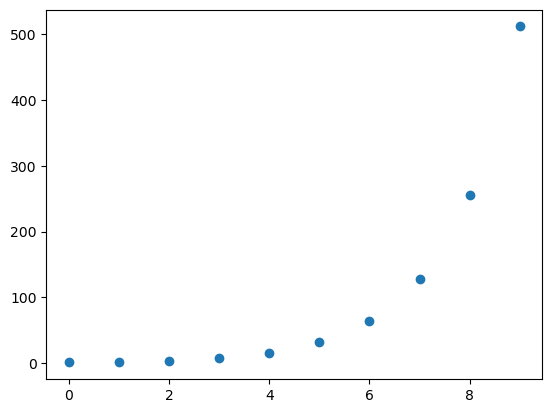

In [2]:
base = 2
target = [pow(base, exponent) for exponent in range(0, 10)]
plt.scatter(y=target, x=range(0, len(target)))

In [3]:
POPULATION_SIZE = 20
NR_GENERATIONS = 500
NR_GENES = len(target)
MULTIPLIERS = [2, 4, 6, 8, 16, 32, 64]
STARTING_GENE_VAL = 2


In [4]:
def initialise_individual(nr_genes=NR_GENES, operators=MULTIPLIERS, starting_gene_val=STARTING_GENE_VAL):
    genome = [{"source":0, "multiplier": 1, "value": STARTING_GENE_VAL}] 
    for idx in range(1, nr_genes):
        source_idx = idx-1
        available_multiplier = random.choice(find_available_multipliers(genome=genome, source_idx=source_idx, multiplier=MULTIPLIERS))
        value = genome[source_idx]["value"] * available_multiplier
        genome.append({"source":source_idx, "multiplier": available_multiplier, "value": value})  
    return {"genome": genome, "fitness": evaluate_fitness(genome, target=target)}

def find_available_multipliers(genome, source_idx, multiplier=MULTIPLIERS):
    used_multiplier = []
    for gene in genome:
        if gene["source"] == source_idx:
            used_multiplier.append(gene["multiplier"])
    available_multiplier = list(set(multiplier) - set(used_multiplier))
    return available_multiplier

def evaluate_fitness(genome, target=target):
    values = [gene["value"] for gene in genome]
    values = sorted(values)    
    fitness = np.abs([target[idx] - values[idx] for idx in range(len(values))]) * -1
    return np.sum(fitness)

def mutate_muliplier(organism):
    gene_idx = random.randint(0, len(organism["genome"])-1)
    new_muliplier = random.choice(find_available_multipliers(organism["genome"], organism["genome"][gene_idx]["source"], multiplier=MULTIPLIERS))
    organism["genome"][gene_idx]["multiplier"] = new_muliplier
    organism["genome"][gene_idx]["value"] = organism["genome"][gene_idx]["source"] * new_muliplier
    return organism
    
def mutate_source(genome):
    gene_idx = random.randint(0, len(genome)-1)
    source_new = gene_idx
    while source_new == gene_idx:
        source_new = random.randint(0, len(genome)-1)
    genome[gene_idx]["source"] = source_new
    genome[gene_idx]["value"] = source_new * genome[gene_idx]["multiplier"]
    return genome

def get_population_fitness_avg(population):
    population_fitness_avg = np.average([value["fitness"] for key, value in population.items()])
    return population_fitness_avg
    
def create_new_generation(population):
    population_fitness_avg = get_population_fitness_avg(population)
    new_population = population
    for organism_id in population.keys():
        if new_population[organism_id]["fitness"] < population_fitness_avg:
            if random.random() < 0.5:
                new_population[organism_id]["genome"] = mutate_source(new_population[organism_id]["genome"])
            else:
                new_population[organism_id] = mutate_muliplier(new_population[organism_id])   
    return new_population

def get_values(genome, target=target):
    values = [gene["value"] for gene in genome]
    values = sorted(values)    
    return values

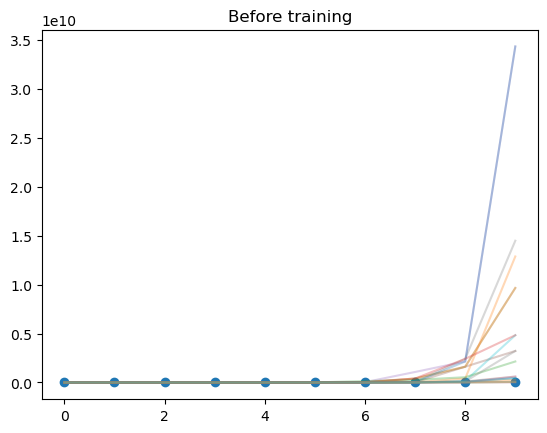

In [5]:
# create initial solutions
population = {f"organism_{organism_idx}": initialise_individual() for organism_idx in range(POPULATION_SIZE)}

for organism_id in population.keys():
    plt.plot(get_values(population[organism_id]["genome"], target), alpha=0.3)
plt.scatter(y=target, x=range(0, len(target)))
plt.title("Before training")
plt.show()

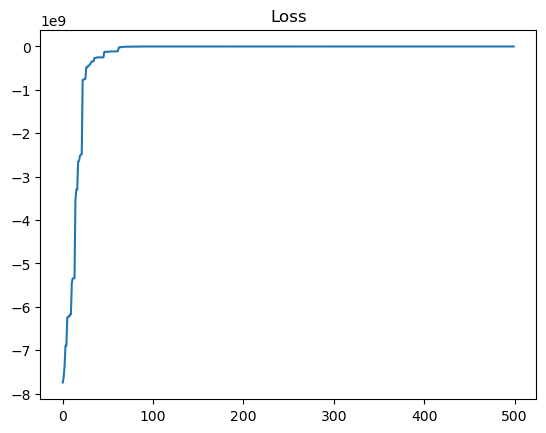

In [6]:
fitness_avg_log = []
for generation in range(NR_GENERATIONS):
    for organism_id in population.keys():
        population[organism_id]["fitness"] = evaluate_fitness(population[organism_id]["genome"], target)
    fitness_avg_log.append(get_population_fitness_avg(population))
    population = create_new_generation(population)

plt.plot(fitness_avg_log)
plt.title("Loss")
plt.show()

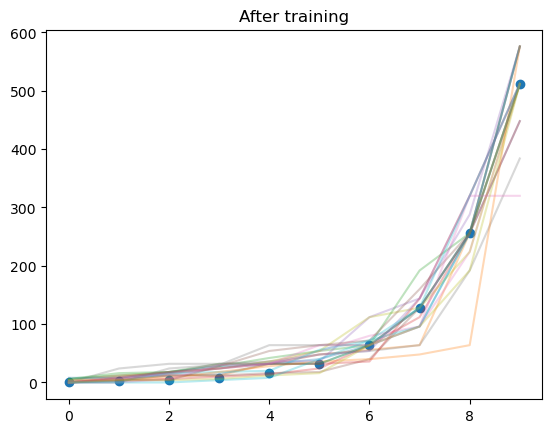

In [9]:
for organism_id in population.keys():
    plt.plot(get_values(population[organism_id]["genome"], target), alpha=0.3)
plt.scatter(y=target, x=range(0, len(target)))
plt.title("After training")
plt.show()

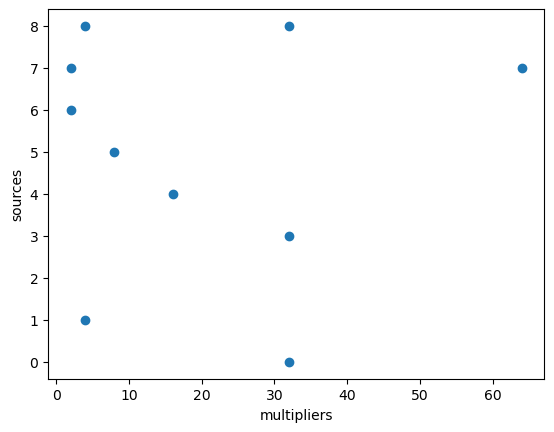

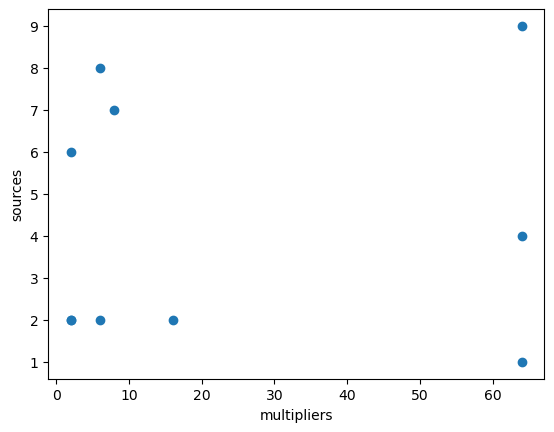

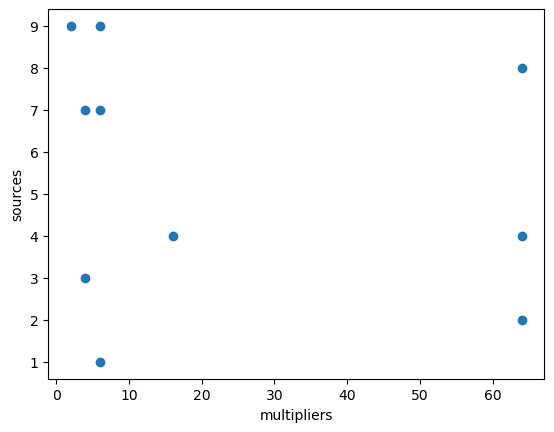

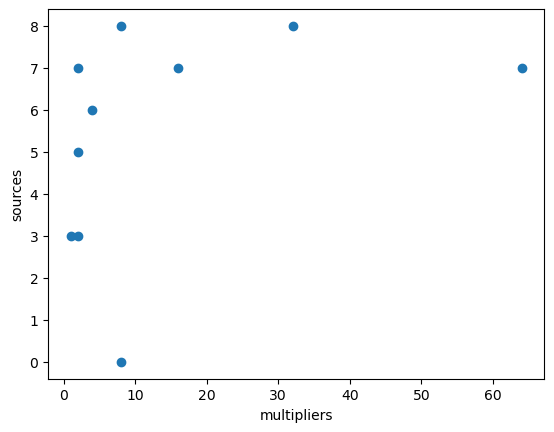

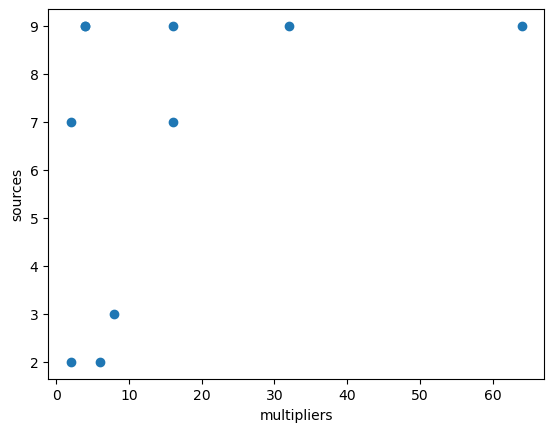

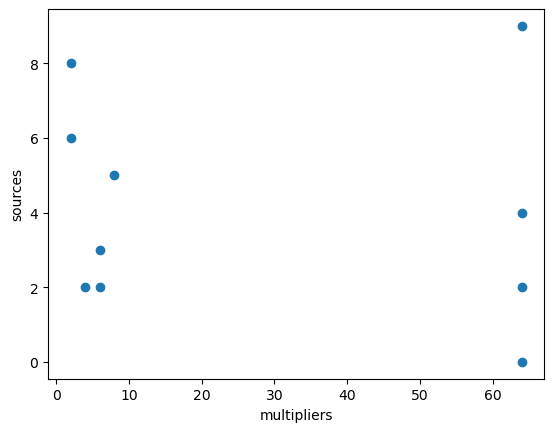

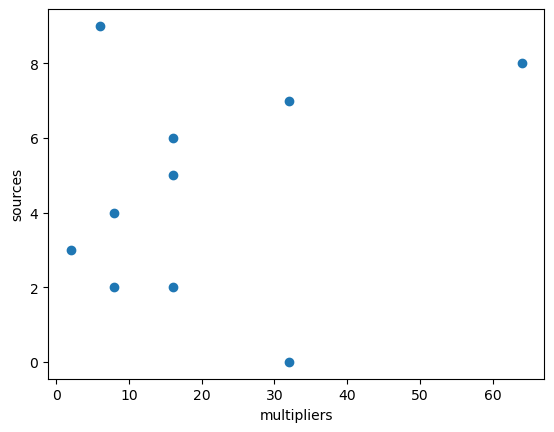

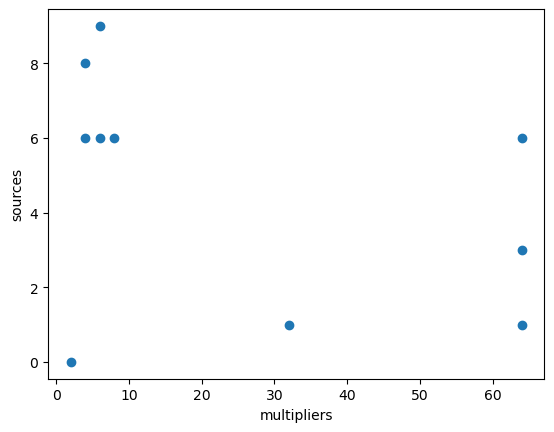

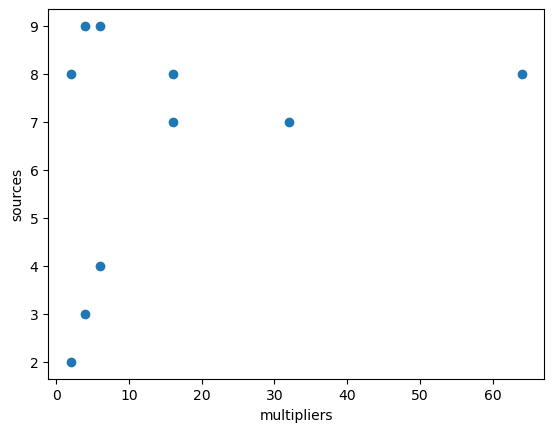

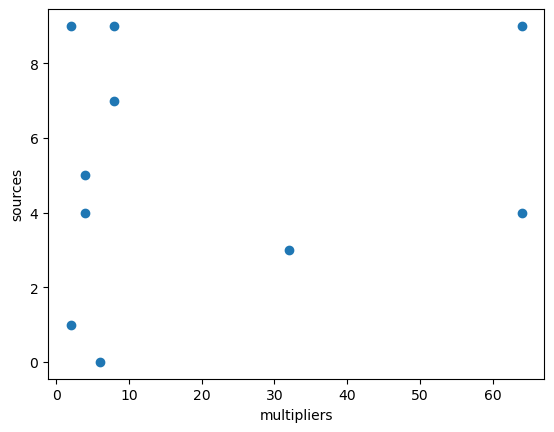

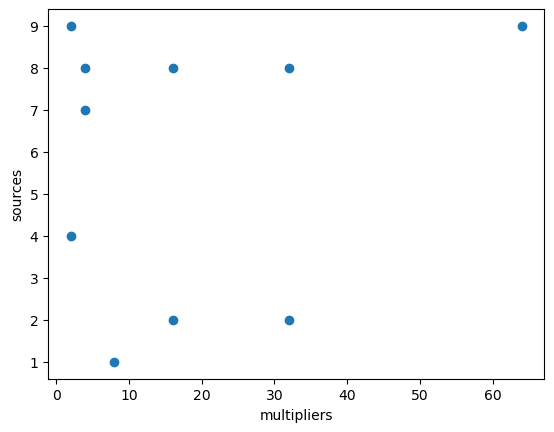

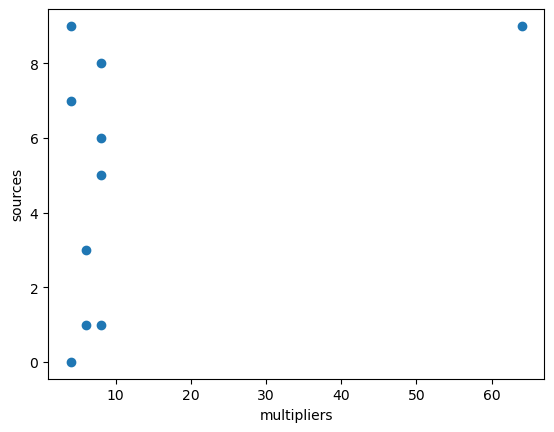

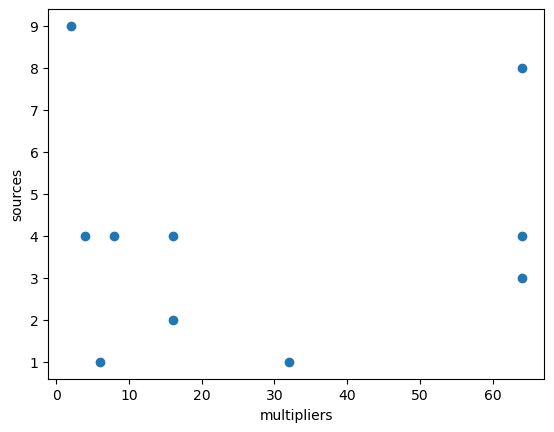

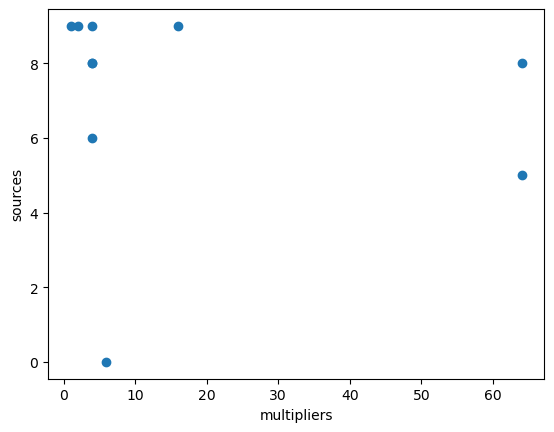

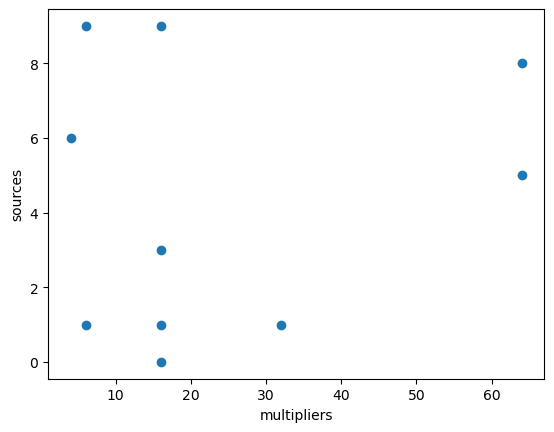

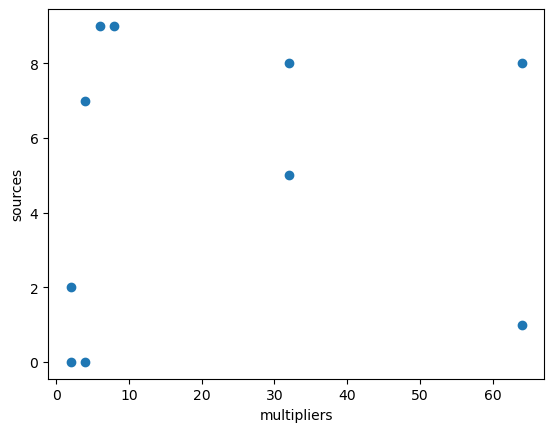

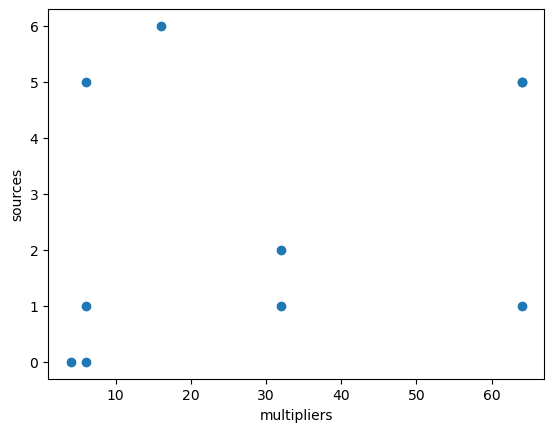

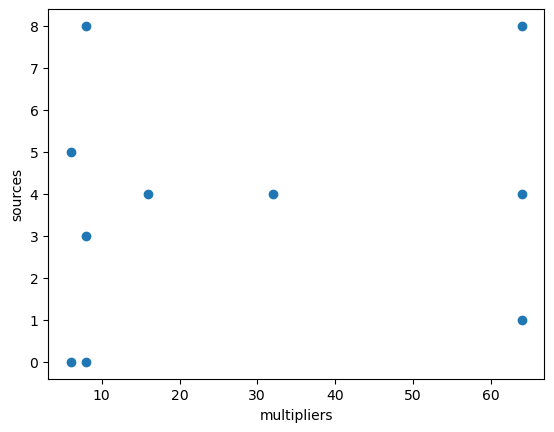

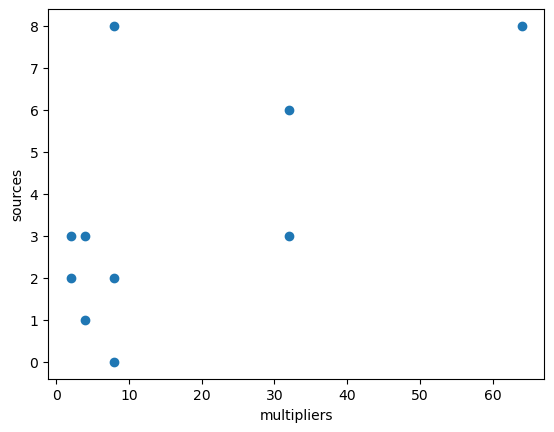

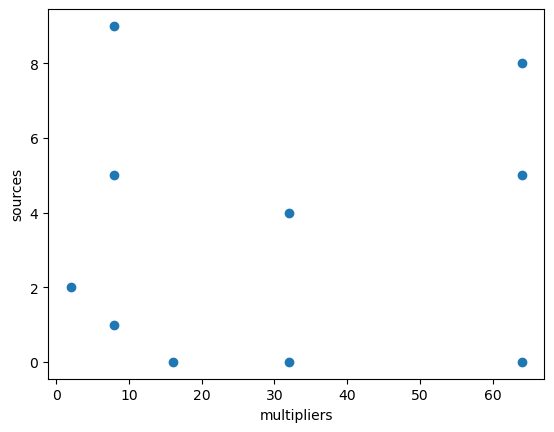

In [8]:
def get_genes(genome, target=target):
    multipliers = [gene["multiplier"] for gene in genome]
    sources = [gene["source"] for gene in genome]
    return multipliers, sources

for organism_id in population.keys():
    multipliers, sources = get_genes(population[organism_id]["genome"], target)
    plt.scatter(x=multipliers, y=sources)
    plt.xlabel("multipliers")
    plt.ylabel("sources")
    plt.show()